# Atividade 2: Classificação com KNN

Nome: Juan Felipe Da Silva Rangel

O objetivo desta atividade é explorar o dataset 'water_potability_nonas.csv' e implementar um sistema de classificação utilizando o classificador KNN. O PCA será utilizado para reduzir a dimensionalidade e por fim será analisado o desempenho do classificador KNN utilizando validação cruzada em dois níveis.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [4]:
df = pd.read_csv('water_potability_nonans.csv')
columns = df.columns
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2006,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
2007,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2008,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
2009,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
2010,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1


In [5]:
pd.set_option('display.max_columns', None)
df.groupby('Potability').describe()

ph                                                    \
             count      mean       std       min       25%       50%   
Potability                                                             
0           1200.0  7.067201  1.659106  1.431782  5.982888  6.992004   
1            811.0  7.113791  1.437623  0.227499  6.256039  7.046549   

                                Hardness                                    \
                 75%        max    count        mean        std        min   
Potability                                                                   
0           8.141979  14.000000   1200.0  196.008440  30.717642  98.452931   
1           7.955161  11.898078    811.0  195.908341  35.301146  73.492234   

                                                            Solids  \
                   25%         50%         75%         max   count   
Potability                                                           
0           177.313440  196.799368  214.532109  300.292476  1200.0   
1           174.380497  197.617494  218.414531  317.338124   811.0   

                                                                  \
                    mean          std          min           25%   
Potability                                                         
0           21628.535122  8461.108693   320.942611  15378.907323   
1           22344.922883  8891.547966  1198.943699  15816.076607   

                                                     Chloramines            \
                     50%           75%           max       count      mean   
Potability                                                                   
0           20507.399647  26786.546213  55334.702799      1200.0  7.107267   
1           21217.158596  27696.134419  56488.672413       811.0  7.174395   

                                                                         \
                 std       min       25%       50%       75%        max   
Potability                                                                
0           1.476577  2.456014  6.169384  7.103718  8.076759  12.653362   
1           1.732796  1.390871  6.106169  7.212254  8.181431  13.127000   

           Sulfate                                                             \
             count        mean        std         min         25%         50%   
Potability                                                                      
0           1200.0  333.742928  36.398403  203.444521  310.653441  332.615625   
1            811.0  332.457832  47.446190  129.000000  301.768819  331.087177   

                                   Conductivity                         \
                   75%         max        count        mean        std   
Potability                                                               
0           356.432048  460.107069       1200.0  427.554342  79.882677   
1           365.632984  481.030642        811.0  425.005423  81.950982   

                                                                        \
                   min         25%         50%         75%         max   
Potability                                                               
0           210.319182  369.580980  424.479471  482.333786  753.342620   
1           201.619737  360.275012  421.099917  482.296528  695.369528   

           Organic_carbon                                            \
                    count       mean       std       min        25%   
Potability                                                            
0                  1200.0  14.400250  3.370196  4.371899  12.118659   
1                   811.0  14.294764  3.257917  2.200000  12.148355   

                                            Trihalomethanes             \
                  50%        75%        max           count       mean   
Potability                                                               
0           14.351828  16.787531  27.006707          1200.0  66.278712   
1    

# Explorando Dataset
Abaixo estão algumas visualizações com o objetivo de verificar a separabilidade do nosso dataset, e como será possível perceber abaixo, nenhum dos atributos ou nenhuma combinação de atributos parece muito boa para utilizar para classificar nossa classe de potabilidade ('Potability').

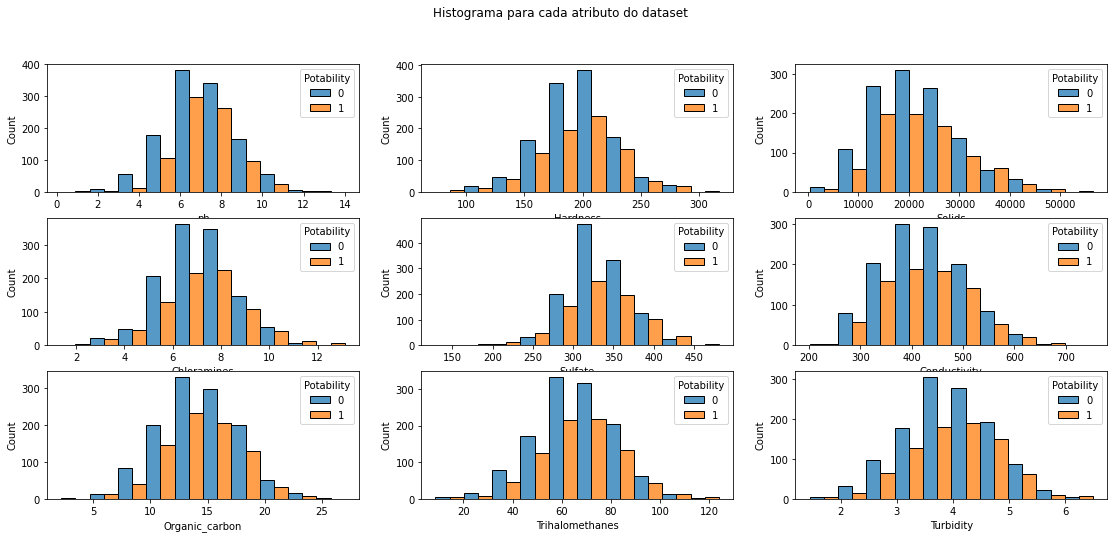

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(19,8))
fig.suptitle('Histograma para cada atributo do dataset')

sns.histplot(data=df, bins=10, x='ph', hue='Potability', multiple='dodge', ax=axes[0][0])
sns.histplot(data=df, bins=10, x='Hardness', hue='Potability', multiple='dodge', ax=axes[0][1])
sns.histplot(data=df, bins=10, x='Solids', hue='Potability', multiple='dodge', ax=axes[0][2])
sns.histplot(data=df, bins=10, x='Chloramines', hue='Potability', multiple='dodge', ax=axes[1][0])
sns.histplot(data=df, bins=10, x='Sulfate', hue='Potability', multiple='dodge', ax=axes[1][1])
sns.histplot(data=df, bins=10, x='Conductivity', hue='Potability', multiple='dodge', ax=axes[1][2])
sns.histplot(data=df, bins=10, x='Organic_carbon', hue='Potability', multiple='dodge', ax=axes[2][0])
sns.histplot(data=df, bins=10, x='Trihalomethanes', hue='Potability', multiple='dodge', ax=axes[2][1])
sns.histplot(data=df, bins=10, x='Turbidity', hue='Potability', multiple='dodge', ax=axes[2][2])

plt.show()

Para que seja possível também verificar as classes utilizando uma combinação de dois atributos, utilizei o pairplot para todos os atributos do dataset, o que resultou em uma matriz de scatterplots com 9 linhas e 9 colunas

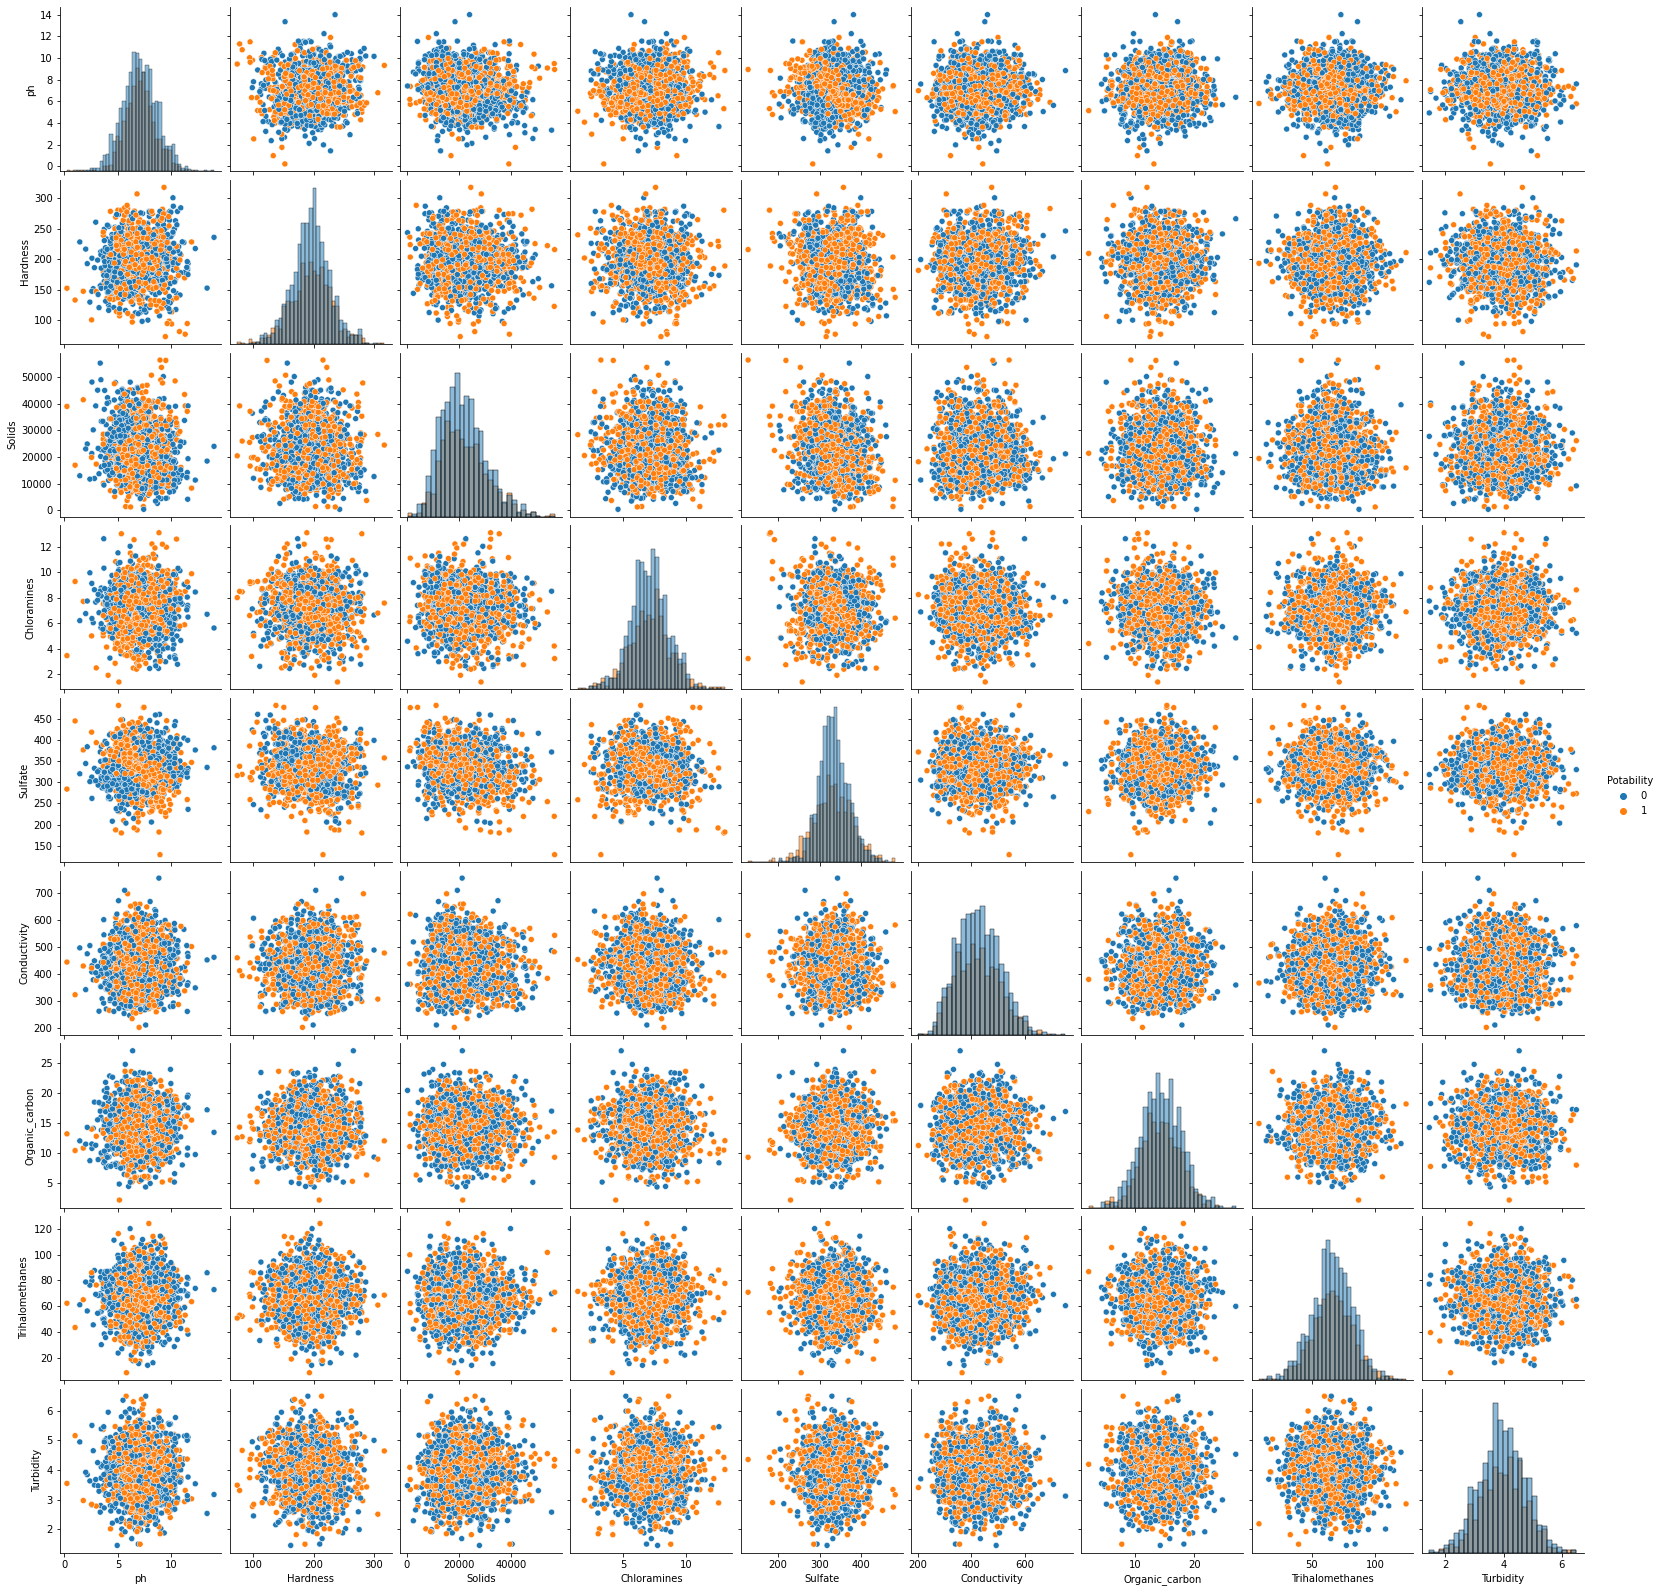

In [7]:
sns.pairplot(data=df, hue='Potability', diag_kind='hist')

# Utilizando PCA
Como há um grande de dimensões no nosso dataset, e a separabilidade não é muito boa, utilizarei o PCA para realizar uma diminuição de dimensionalidade, saindo de 9 dimensões somente para 2, verificando em seguida como ficou o espaço formado.

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Normalizando os dados
Antes de tudo é necessário realizar a normalização dos nossos dados, para que os atributos não sejam enviezados somente por estar em uma escala diferente, o que afetaria o peso desse atributo no momento , resultando em um PC0 e PC1 diferentes ao realizar a diminuição da dimensionalidade com o PCA.
Para executar a normalização utilizei o StandScaler, como é possível observar na célula abaixo, utilizando o dataset sem a última coluna 'Potability'.

In [9]:
# Normaliza os dados
X = df.loc[:, df.columns != 'Potability']
y_values = df['Potability'].values

# instancia o Stand Scaler
ss = StandardScaler()
ss.fit(X)

X_ss = ss.transform(X)
X_ss = pd.DataFrame( np.hstack((X_ss, df['Potability'].values.reshape((-1,1)) )), columns=columns  )


Agora sim é possível fazer o PCA, com os dados anteriormente normalizados, podendo também observar a distribuição das classes após realizar a redução de dimensionalidade.

<AxesSubplot:xlabel='PC 0', ylabel='PC 1'>

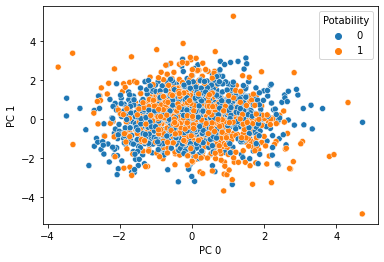

In [10]:

y_values = X_ss['Potability'].values
X_df = X_ss.loc[:, X_ss.columns != 'Potability']
X_df
# instancia o PCA
pca = PCA(n_components=2)
pca.fit(X_df)

# # Projeta 9 atributos nos 2 componentes principais
X_pca = pca.transform(X_df)
X_pca = pd.DataFrame(X_pca, columns=['PC 0', 'PC 1'])

sns.scatterplot(data=X_pca, x='PC 0', y='PC 1', hue=df['Potability'])

O gráfico abaixo representa o peso que cada atributo teve para definição dos atributos PC 0 e PC 1, e como os dados já estão normalizados, não haverá o problema de uma característica estar em escalas diferentes, influenciando a importância de tal característica.

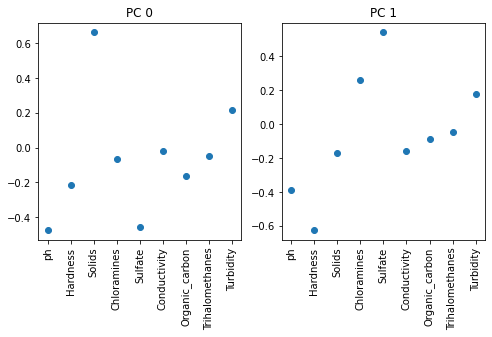

In [11]:
fig, ax = plt.subplots(figsize=(8,4), nrows=1, ncols=2)
for idx, pc in enumerate(pca.components_):
    ax[idx].scatter(np.arange(len(X.columns)), pc)
    ax[idx].set_xticks(np.arange(len(X.columns)))
    ax[idx].set_xticklabels(X.columns, rotation=90)
    ax[idx].set_title('PC %d' % (idx))
plt.show()

# Validação cruzada em dois níveis
Nesta validação cruzada foram utilizados 10 folds para o primeiro nível, e 5 folds para o segundo nível. Em mais detalhes, primeiramente o dataset é dividido em 10 partes, onde 1 representa o conjunto de teste e as outras representam o conjunto de treinamento, porém isso é feito 10 vezes, ou seja, todo o conjunto é utilizado como conjunto de teste. Esse processo descrito anteriormente é o que chamamos de primeiro nível.
Já o segundo nível é definido por realizar o mesmo processo, porém utilizando o conjunto de treino e validação, a diferença neste caso, é o nosso número de folds é igual a 5.


In [12]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [13]:
# Serão utilizadas 10 vias no primeiro nível da validação cruzada
k_vias_primeiro_nivel = 10
k_vias_segundo_nivel = 5
n_neighbors = {'n_neighbors' : range(1,50, 2)}
acuracias_folds = []
X = X.values

skf = StratifiedKFold(n_splits=k_vias_primeiro_nivel, shuffle=True, random_state=1)

# Pego as instancias de cada fold
for treino_idx, teste_idx in skf.split(X, y_values):
    
    # Pega as instancias de treinamento
    X_treino = X[treino_idx]
    y_treino = y_values[treino_idx]

    # Pega as instancias de teste
    X_teste = X[teste_idx]
    y_teste = y_values[teste_idx]
    
    # Realiza normalização utilizando o conjunto de trainamento
    ss.fit(X_treino)
    X_treino = ss.transform(X_treino)
    X_teste = ss.transform(X_teste)

    # instancio o knn sem nenhum parâmetro novo
    knn = KNeighborsClassifier()

    # instancio o GridSearch com k vias do segundo nível
    knn = GridSearchCV(knn, n_neighbors, cv=StratifiedKFold(n_splits=k_vias_segundo_nivel))
    knn.fit(X_treino, y_treino)
    pred = knn.predict(X_teste)

    acuracias_folds.append(accuracy_score(y_teste, pred))

print("Desvio: %.2f +- %.2f Max: %.2f Min: %.2f" % (np.mean(acuracias_folds), np.std(acuracias_folds), max(acuracias_folds), min(acuracias_folds)))

Desvio: 0.65 +- 0.01 Max: 0.67 Min: 0.63
